In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score 

In [2]:
df_final = pd.read_csv("df_final_2.csv")

In [3]:
cat_cols = ['os', 'browser','slot_id', "ssp_uid",'carrier_name', 'region','creative_type','sponsor_id','campaign_id','creative_id',"is_rt", 'request_hour',
       'request_month', 'request_day', 'request_dayofweek', 'rt_times']
for c in cat_cols:
    vv, obj = pd.factorize(df_final[c])
    df_final[c] = vv

In [4]:
df_final = df_final.fillna(0)

In [34]:
df_final.iloc[:,8:20].describe()

,sponsor_id,campaign_id,creative_type,creative_id,region,fq,inview_fq,recency,inview_recency,click_flg
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.165935,11.498295,0.002550,59.300580,6.422035,2.673255,-0.776795,1.158792,-0.314470,0.100000
std,1.435267,9.794459,0.050433,64.567396,10.314744,19.896017,1.918865,3.777601,2.292502,0.300001
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-11.512925,-11.512925,0.000000
25%,0.000000,3.000000,0.000000,12.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,10.000000,0.000000,35.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,3.000000,18.000000,0.000000,84.000000,7.000000,1.000000,-1.000000,3.555348,-1.000000,0.000000
max,4.000000,38.000000,1.000000,300.000000,47.000000,3131.000000,202.000000,11.366616,11.366627,1.000000


# Without My Features

In [5]:
df_final = df_final.drop(["Unnamed: 0"], axis = 1)
df_final = df_final.drop(["request_time"], axis = 1)
df_final = df_final.drop(["click_time"], axis = 1)
df_final = df_final.drop(["cv_time"], axis = 1)
df_final = df_final.drop(["cv_flg"], axis = 1)
df_final = df_final.drop(["ssp_uid"], axis = 1)
df_final = df_final.drop(["req_id"], axis = 1)
df_final = df_final.drop(["os"], axis = 1)
df_final = df_final.drop(["carrier_name"], axis = 1)
df_final = df_final.drop(["request_month"], axis = 1)
df_final = df_final.drop(["request_dayofweek"], axis = 1)
df_final = df_final.drop(["request_hour"], axis = 1)
df_final = df_final.drop(["request_day"], axis = 1)
df_final = df_final.drop(["rt_times"], axis = 1)
df_final = df_final.drop(["cv_flg_0"], axis = 1)
df_final = df_final.drop(["click_flg_1"], axis = 1)
df_final = df_final.drop(["cv_flg_1"], axis = 1)
df_final = df_final.drop(["click_flg_2"], axis = 1)
df_final = df_final.drop(["cv_flg_2"], axis = 1)
#df_final = df_final.drop(["click_user"], axis = 1)

In [6]:
df_dummy = pd.get_dummies(df_final, drop_first=True, columns=['browser','slot_id',
                                   'region','creative_type','sponsor_id','campaign_id',
                                   'creative_id'])

In [7]:
num_data=len(df_final)
x_dummy = df_dummy.drop(["click_flg"], axis = 1)
y_dummy = df_dummy["click_flg"]
train_x = x_dummy.iloc[0:int(num_data*0.8),:]
val_x = x_dummy.iloc[int(num_data*0.8):int(num_data*0.9),:]
test_x = x_dummy.iloc[int(num_data*0.9):num_data,:]
train_y = y_dummy[0:int(num_data*0.8)]
val_y = y_dummy[int(num_data*0.8):int(num_data*0.9)]
test_y = y_dummy[int(num_data*0.9):num_data]

In [8]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
model = rfc.fit(train_x, train_y)
y_pred = model.predict_proba(test_x)[:, 1]
print(roc_auc_score(test_y, y_pred))

0.7927242763057671


In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate a no skill prediction (majority class)
no_skill_probs = [i for i in np.random.rand(len(test_y))]
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(test_y, no_skill_probs)
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred)
print("AUC(PR):%s" %str(auc(lr_recall, lr_precision)))

AUC(PR):0.3264863232728729


# With My Features

In [5]:
df_final = df_final.drop(["Unnamed: 0"], axis = 1)
df_final = df_final.drop(["request_time"], axis = 1)
df_final = df_final.drop(["click_time"], axis = 1)
df_final = df_final.drop(["cv_time"], axis = 1)
df_final = df_final.drop(["cv_flg"], axis = 1)
df_final = df_final.drop(["ssp_uid"], axis = 1)
df_final = df_final.drop(["req_id"], axis = 1)
df_final = df_final.drop(["os"], axis = 1)
df_final = df_final.drop(["carrier_name"], axis = 1)
df_final = df_final.drop(["request_month"], axis = 1)
df_final = df_final.drop(["request_dayofweek"], axis = 1)
df_final = df_final.drop(["rt_times"], axis = 1)
df_final = df_final.drop(["cv_flg_0"], axis = 1)
df_final = df_final.drop(["click_flg_1"], axis = 1)
df_final = df_final.drop(["cv_flg_1"], axis = 1)
df_final = df_final.drop(["click_flg_2"], axis = 1)
df_final = df_final.drop(["cv_flg_2"], axis = 1)
#df_final = df_final.drop(["click_user"], axis = 1)

In [6]:
df_dummy = pd.get_dummies(df_final, drop_first=True, columns=['browser','slot_id',
                                   'region','creative_type','sponsor_id','campaign_id',
                                   'creative_id', 'request_hour',
                                   'request_day'])

In [7]:
num_data=len(df_final)
x_dummy = df_dummy.drop(["click_flg"], axis = 1)
y_dummy = df_dummy["click_flg"]
train_x = x_dummy.iloc[0:int(num_data*0.8),:]
val_x = x_dummy.iloc[int(num_data*0.8):int(num_data*0.9),:]
test_x = x_dummy.iloc[int(num_data*0.9):num_data,:]
train_y = y_dummy[0:int(num_data*0.8)]
val_y = y_dummy[int(num_data*0.8):int(num_data*0.9)]
test_y = y_dummy[int(num_data*0.9):num_data]

In [8]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
model = rfc.fit(train_x, train_y)
y_pred = model.predict_proba(test_x)[:, 1]
print(roc_auc_score(test_y, y_pred))

0.7932694876605486


In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate a no skill prediction (majority class)
no_skill_probs = [i for i in np.random.rand(len(test_y))]
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(test_y, no_skill_probs)
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred)
print("AUC(PR):%s" %str(auc(lr_recall, lr_precision)))

AUC(PR):0.32777399892351766


Text(0,0.5,'TPR: True positive rate')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


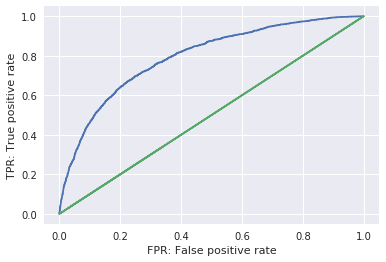

In [10]:
import pylab as pl
from sklearn import metrics
# FPR, TPR(, しきい値) を算出
roc_p = metrics.roc_curve(test_y, y_pred, drop_intermediate=False)
x = np.random.rand(len(test_y))
y = x
plt.plot(roc_p[0], roc_p[1],linestyle='-')
plt.plot(x, y)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


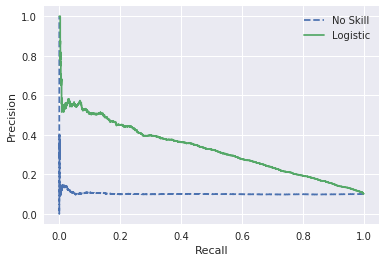

In [11]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate a no skill prediction (majority class)
no_skill_probs = [i for i in np.random.rand(len(test_y))]
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(test_y, no_skill_probs)
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred)

# plot the precision-recall curves
pyplot.plot(ns_recall, ns_precision, linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, linestyle='-', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [12]:
y_pred_str = [str(n) for n in y_pred]

In [13]:
with open('logistic.txt', 'w') as rd:
    rd.writelines('\n'.join(y_pred_str))

# Under sampling

In [18]:
# Class count
train = df_dummy.iloc[0:int(num_data*0.8),:]
count_class_0, count_class_1 = train.click_flg.value_counts()

# Divide by class
df_class_0 = train[train['click_flg'] == 0]
df_class_1 = train[train['click_flg'] == 1]

df_class_0_under = df_class_0.sample(int(count_class_1))

In [19]:
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [20]:
num_data=len(df_final)
x_dummy = df_dummy.drop(["click_flg"], axis = 1)
y_dummy = df_dummy["click_flg"]
train_x = df_train_under.drop(["click_flg"], axis = 1)
val_x = x_dummy.iloc[int(num_data*0.8):int(num_data*0.9),:]
test_x = x_dummy.iloc[int(num_data*0.9):num_data,:]
train_y = df_train_under["click_flg"]
val_y = y_dummy[int(num_data*0.8):int(num_data*0.9)]
test_y = y_dummy[int(num_data*0.9):num_data]

In [21]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
model = rfc.fit(train_x, train_y)
y_pred = model.predict_proba(test_x)[:, 1]
print(roc_auc_score(test_y, y_pred))

0.7873593893876082


In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate a no skill prediction (majority class)
no_skill_probs = [i for i in np.random.rand(len(test_y))]
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(test_y, no_skill_probs)
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred)
print("AUC(PR):%s" %str(auc(lr_recall, lr_precision)))

AUC(PR):0.3159387955247998


In [44]:
from sklearn.metrics import roc_curve, auc
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [45]:
def probability_calibration(y_proba, beta):
    """サンプリングレートを元に確率を補正する"""
    calibrated_proba = y_proba / (y_proba + (1 - y_proba) / beta)
    return calibrated_proba
train_y_all = y_dummy[0:int(num_data*0.8)]
# サンプリングレートを元に確率を補正する
y_train_zero_len = np.count_nonzero(train_y == 0)
beta = y_train_zero_len / len(train_y_all)
y_pred_proba_cb = probability_calibration(np.array(y_pred),beta)
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(test_y, y_pred_proba_cb)
print (threshold)

# Find prediction to the dataframe applying threshold
pred_cb = []
for i in y_pred_proba_cb:
  if i>threshold:
    pred_cb.append(1)
  else:
    pred_cb.append(0)
print(roc_auc_score(test_y, y_pred_proba_cb))
# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_cb)


[0.08752093719409444]
0.7892474568482496


/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


array([[12909,  5080],
       [  568,  1443]])

In [35]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
class StackedGeneralization:
    def __init__(self, n_folds, train_data, train_target, test_data):
        self.n_folds = n_folds
        self.train_data = train_data
        self.train_target = train_target
        self.test_data = test_data
        self.n_classes = len(numpy.unique(train_target))
        self.skf = StratifiedKFold(y=train_target, n_folds=n_folds)

class Generalizer:
    def __init__(self):
        self.model = None

    def name(self):
        raise NotImplementedError

    def guess_partial(self, sg):
        assert(isinstance(sg, StackedGeneralization))
        generalizer_prediction = numpy.empty((0, 1))
        for train_index, test_index in sg.skf:
            self.train(sg.train_data[train_index],
                       sg.train_target[train_index])
            generalizer_prediction = numpy.vstack((generalizer_prediction,
                self.predict(sg.train_data[test_index]).reshape(len(test_index),1)))
        reorder_index = [test_index for _, test_indices in sg.skf for test_index in test_indices]
        return(generalizer_prediction[reorder_index])

    def guess_whole(self, sg):
        assert(isinstance(sg, StackedGeneralization))
        return(self.guess(sg.train_data, sg.train_target, sg.test_data))

    def guess(self, input_data, input_target, test_data):
        self.train(input_data, input_target)
        return(self.predict(test_data).reshape(len(test_data),1))

    def train(self, data, label):
        raise NotImplementedError

    def predict(self, data):
        raise NotImplementedError

    @staticmethod
    def load_partial(name):
        return(numpy.load(Generalizer._partial_path(name)))

    @staticmethod
    def load_whole(name):
        return(numpy.load(Generalizer._whole_path(name)))

    @staticmethod
    def save_partial(name, prediction):
        numpy.save(Generalizer._partial_path(name), prediction)

    @staticmethod
    def save_whole(name, prediction):
        numpy.save(Generalizer._whole_path(name), prediction)

    @staticmethod
    def _partial_path(name, has_ext = True):
        return(path.join("data", "partial", Generalizer._add_ext(name, has_ext)))

    @staticmethod
    def _whole_path(name, has_ext = True):
        return(path.join("data", "whole", Generalizer._add_ext(name, has_ext)))

    @staticmethod
    def _add_ext(name, has_ext):
        if has_ext:
            return(name + '.npy')
        else:
            return(name)

In [7]:
def train_layer0(sg, generalizers, save_predictions = False):
    layer0_partition_guess = numpy.array([generalizer.guess_partial(sg) for generalizer in generalizers])

    for generalizer_index, generalizer in enumerate(generalizers):
        if save_predictions:
            Generalizer.save_partial(generalizer.name(),
                                              layer0_partition_guess[generalizer_index])
        print("log loss for {} : {}".format(
            generalizer.name(),
            log_loss(sg.train_target, layer0_partition_guess[generalizer_index, :, :])
        ))

    layer0_whole_guess = numpy.array([generalizer.guess_whole(sg) for generalizer in generalizers])
    for generalizer_index, generalizer in enumerate(generalizers):
        if save_predictions:
            Generalizer.save_whole(generalizer.name(),
                                   layer0_whole_guess[generalizer_index])

    return(layer0_partition_guess, layer0_whole_guess)

def load_layer0(filenames):
    layer0_partial_guess = numpy.array([Generalizer.load_partial(filename) for
                                        filename in filenames])
    layer0_whole_guess = numpy.array([Generalizer.load_whole(filename) for
                                        filename in filenames])
    return(layer0_partial_guess, layer0_whole_guess)

def initialize_sg(train_data, train_target, test_data):
    n_folds = 5
    return(StackedGeneralization(n_folds, train_data, train_target, test_data))

In [ ]:
class RandomForest(Generalizer):
    def name(self):
        return("random_forest")

    def train(self, data, label):
        rfc = RandomForestClassifier(n_estimators = 300, max_depth = 32, min_samples_split = 16, max_leaf_nodes = 60)
        self.model = rfc.fit(data, label)

    def predict(self, data):
        return(self.model.predict_proba(data)[:, 1])
class Lightgbm(Generalizer):
    def name(self):
        return("light  gbm")

    def train(self, train_x, train_y):
      train_data = lgb.Dataset(train_x, label=train_y)
      eval_data = lgb.Dataset(test_x, label=test_y, reference= train_data)
      self.model = lgb.train(params, train_data, valid_sets=eval_data,evals_result=evals_result, fobj=focal_loss, feval=focal_loss_eval)
    def predict(self, data):
        return(self.model.predict(data, num_iteration=self.model.best_iteration))
class LR(Generalizer):
    def name(self):
        return("logistic_regression")

    def train(self, data, label):
        rfc = LogisticRegression()
        self.model = rfc.fit(data, label)

    def predict(self, data):
        return(self.model.predict_proba(data)[:, 1])

In [ ]:
import numpy
sg = initialize_sg(train_x.values, train_y.values, test_x.values)
# for ad-hoc training
generalizers = [RandomForest(), Lightgbm(), LR()]
layer0_partition_guess, layer0_whole_guess = train_layer0(sg, generalizers)

# loading predictions
#layer0_partition_guess, layer0_whole_guess = load_layer0(["random_forest","extra_trees"])

result = LR().guess(
  numpy.hstack(layer0_partition_guess),
  sg.train_target,
  numpy.hstack(layer0_whole_guess))
print(roc_auc_score(test_y, result))

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


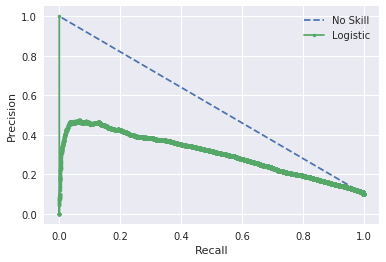

In [17]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(test_y))]
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(test_y, no_skill_probs)
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred)

# plot the precision-recall curves
pyplot.plot(ns_recall, ns_precision, linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [18]:
from sklearn.metrics import auc
print("AUC(PR):%s" %str(auc(lr_recall, lr_precision)))

AUC(PR):0.30401781085755886
